In [68]:
import os
os.chdir('DLFromScratch2')

In [1]:
import numpy as np

# 1. 수학과 파이썬 복습

## 1.1. 벡터와 행렬

In [4]:
# 벡터와 행렬
x = np.array([1,2,3])
x.__class__


numpy.ndarray

In [5]:
x.shape

(3,)

In [6]:
x.ndim

1

In [7]:
W = np.array([[1,2,3], [4,5,6]])

In [8]:
W.shape

(2, 3)

In [10]:
W.ndim

2

## 1.2. 행렬의 원소별 연산

In [11]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])

W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [12]:
W*X

array([[ 0,  2,  6],
       [12, 20, 30]])

## 1.3. 브로드캐스트
numpy 다차원 배열에서는 형상이 다른 배열끼리도 연산 가능

In [14]:
A= np.array([[1,2],[3,4]])
A*10 # 10이 (2,2) 행렬로 확장되어 처리

array([[10, 20],
       [30, 40]])

In [17]:
A= np.array([[1,2],[3,4]])
b = np.array([10,20])
A*b # b가 [[10,20], [10,20]]으로 확장

array([[10, 40],
       [30, 80]])

## 1.4. 벡터 내적과 행렬 곱

In [18]:
# 벡터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [19]:
# 행렬의 곱
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

In [20]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

# 2. 신경망의 추론

- 입력층 2개, 출력층 3개, 은닉층 4개 뉴런 가정
- 은닉층의 뉴런은 가중치의 합으로 계산

$h_1 = x_1w_{11} + x2w_{21} + b_1 $

- 행렬 곱으로 정리 가능

$h = xW + b $

- 형상
    - x: Nx2
    - W: 2x4
    - h: Nx4
   


In [21]:
import numpy as np
W1 = np.random.randn(2,4) # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10,2) # 입력
h = np.matmul(x, W1) +b1

In [22]:
# 시그모이드 활성화 함수 사용
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [25]:
# 활성화 함수를통해 비선형 변환
a = sigmoid(h)

In [27]:
x = np.random.randn(10,2) # 입력
W1 = np.random.randn(2,4) # 가중치
b1 = np.random.randn(4) # 편향

W2 = np.random.randn(4,3) # 가중치
b2 = np.random.randn(3) # 편향

h = np.matmul(x, W1) + b1 # (10,4)
a = sigmoid(h) #(10,4)
s = np.matmul(a, W2) + b2 # (10,3) -> 출력층에서 가장 큰 값을 뱉는 뉴런에 해당하는 클래스가 예측 결과가 됨

## 2.2. 계층으로 클래스화 및 순전파 구현

In [28]:
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1/(1+np.exp(-x))

In [29]:
# Affine: 순전파 시 행렬곱을 수행하는 계층
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W,b = self.params
        out = np.matmul(x,W) + b
        return out

In [42]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(), 
            Affine(W2, b2)
        ]
        
        # 모든 가중치 리스트에 모으기
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)

        return x

In [43]:
x = np.random.randn(10,2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

# 3. 신경망의 학습

## 3.1. 손실 함수

- 소프트맥스 함수

$y_k = {exp(s_k)}/{\sum_{i=1}^{n}(exp(s_i))}$

- 교차 엔트로피오차

$ L = = - \sum_{k} t_k \log{y_k}$

- 미니 배치 처리를 고려한 교차 엔트로피 식

$ L = = - \frac{1}{N}\sum_{n}\sum_{k} t_{nk} \log{y_nk}$


## 3.2. 미분과 기울기

- 미분: x의 값을 조금 변화 시켰을 때 y 값이 얼마나 변하는가에 대한 변화의 정도,
$\frac{dy}{dx}$
- 기울기: 벡터의 각 원소에 대한 미분을 정리한 것

## 3.3. 연쇄 법칙

- $z = x+y$

    - $\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial x} $
    - $\frac{\partial L}{\partial y} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial y} $

- 곱셈 노드: $z = xy$

    - $\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} y $
    - $\frac{\partial L}{\partial y} = \frac{\partial L}{\partial z} x $
    
- 분기 노드: 같은 값이 복제되어 분기 (복제 노드)

- Repeat 노드: 2개로 분기하는 노드를 일반화하면 N개로 분기가 됨. 이를 Repeat 노드라고 함.



In [48]:
# repeat 노드
D, N = 8,7
x = np.random.randn(1,D) # 입력
y = np.repeat(x, N, axis = 0) # 순전파
dy = np.random.randn(N, D) # 무작위 기울기
dx = np.sum(dy, axis=0, keepdims = True) # 역전파

In [49]:
# sum 노드
# 순전파: (N,D) 배열의 합을 0축에 대해 구함
# 역전파: repeat
D, N = 8,7
x = np.random.randn(N, D) # 입력
y = np.repeat(x, N, axis = 0) # 순전파
dy = np.random.randn(1, D) # 무작위 기울기
dx = np.repeat(dy, N, axis=0)# 역전파

Matmul

- $\frac{\partial L}{\partial x_i} \\
  = \sum_j \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial x_i}\\
  = \sum_j \frac{\partial L}{\partial y_j} W_{ij}$
  
- $\frac{\partial L}{\partial y}$와 W의 i행 벡터의 내적으로 구해짐을 알 수 있음
    
    $\frac{\partial L}{\partial x} \\
  = \frac{\partial L}{\partial y} W^{T}$
  
-  $\frac{\partial L}{\partial W}$

    $\frac{\partial L}{\partial W} \\
  = x^{T} \frac{\partial L}{\partial y} $

In [50]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.X = None
        
    def forward(self, x):
        W, = self.params 
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW # for deep copy
        return dx
    

## 3.5. 기울기 도출과 역전파 구현

- sigmoid
    - 수식: 
    $\frac{\mathrm{1} }{\mathrm{1} + e^- x }$
    - 미분: $\frac{\partial y}{\partial x} = y(1-y) $

In [52]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1/(1+np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0-self.out) * self.out
        return dx

In [53]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self, x):
        W,b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db  = np.sum(dout, axis = 0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

## 3.6. 가중치 갱신

신경망 학습 순서
1. 미니 배치: 훈련 데이터 중 무작위로 다수의 데이터를 골라낸다.
2. 기울기 계산: 오차역전파로 각 가중치 매개변수에 대한 손실함수의 기울기를 구한다. 
3. 매개변수 갱신
4. 1~3단계 반복

가중치 갱신의 방법: 확률적 경사 하강법
- $W \leftarrow \eta \frac{\partial L}{\partial W} $
- 가중치를 기울기 방향을 일정 거리만큼 갱신

In [54]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            paramas[i] -= self.lr * grads[i]
            

In [ ]:
# SGD 활용 매개변수 갱신 수도 코드
model = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    x_batch, t_batch = get_mini_batch(...)
    loss = model.forward(x_batch, t_batch)
    model.backward()
    optimizer.update(model.params, model.grads)

# 4. 신경망으로 문제를 풀다

## 4.1. spiral 데이터셋

In [76]:
sys.path.append('..')
from DLFromScratch2.dataset import spiral
x,t = load_data()

In [77]:
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


## 4.2. 신경망 구현

In [72]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [79]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모음
        self.params, self.grads = [],[]
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
        
        def predict(self, x):
            for layer in self.layers:
                x = layer.forward(x)
            return x
        
        def forward(self, x, t):
            score = self.predict(x)
            loss = self.loss_layer.forward(score, t)
            return loss
        
        def backward(self, dout=1):
            dout = self.loss_layer.backward(dout)
            for layer in reversed(self.layers):
                dout = layer.backward(dout)
                
            return dout
        
        

In [85]:
os.chdir('Chap01-Neural_Networks_Review')

  6%|████▌                                                                           | 17/300 [00:00<00:01, 165.49it/s]

| 에폭 1 | 반복10/10 | 손실 1.13
| 에폭 2 | 반복10/10 | 손실 1.13
| 에폭 3 | 반복10/10 | 손실 1.12
| 에폭 4 | 반복10/10 | 손실 1.12
| 에폭 5 | 반복10/10 | 손실 1.11
| 에폭 6 | 반복10/10 | 손실 1.14
| 에폭 7 | 반복10/10 | 손실 1.16
| 에폭 8 | 반복10/10 | 손실 1.11
| 에폭 9 | 반복10/10 | 손실 1.12
| 에폭 10 | 반복10/10 | 손실 1.13
| 에폭 11 | 반복10/10 | 손실 1.12
| 에폭 12 | 반복10/10 | 손실 1.11
| 에폭 13 | 반복10/10 | 손실 1.09
| 에폭 14 | 반복10/10 | 손실 1.08
| 에폭 15 | 반복10/10 | 손실 1.04
| 에폭 16 | 반복10/10 | 손실 1.03
| 에폭 17 | 반복10/10 | 손실 0.96
| 에폭 18 | 반복10/10 | 손실 0.92
| 에폭 19 | 반복10/10 | 손실 0.92
| 에폭 20 | 반복10/10 | 손실 0.87
| 에폭 21 | 반복10/10 | 손실 0.85
| 에폭 22 | 반복10/10 | 손실 0.82
| 에폭 23 | 반복10/10 | 손실 0.79
| 에폭 24 | 반복10/10 | 손실 0.78
| 에폭 25 | 반복10/10 | 손실 0.82
| 에폭 26 | 반복10/10 | 손실 0.78
| 에폭 27 | 반복10/10 | 손실 0.76
| 에폭 28 | 반복10/10 | 손실 0.76
| 에폭 29 | 반복10/10 | 손실 0.78
| 에폭 30 | 반복10/10 | 손실 0.75
| 에폭 31 | 반복10/10 | 손실 0.78
| 에폭 32 | 반복10/10 | 손실 0.77
| 에폭 33 | 반복10/10 | 손실 0.77
| 에폭 34 | 반복10/10 | 손실 0.78
| 에폭 35 | 반복10/10 | 손실 0.75
| 에폭 36 | 반복10/10 | 손실 0.74
|

 20%|███████████████▋                                                                | 59/300 [00:00<00:01, 183.37it/s]


| 에폭 40 | 반복10/10 | 손실 0.75
| 에폭 41 | 반복10/10 | 손실 0.76
| 에폭 42 | 반복10/10 | 손실 0.76
| 에폭 43 | 반복10/10 | 손실 0.76
| 에폭 44 | 반복10/10 | 손실 0.74
| 에폭 45 | 반복10/10 | 손실 0.75
| 에폭 46 | 반복10/10 | 손실 0.73
| 에폭 47 | 반복10/10 | 손실 0.72
| 에폭 48 | 반복10/10 | 손실 0.73
| 에폭 49 | 반복10/10 | 손실 0.72
| 에폭 50 | 반복10/10 | 손실 0.72
| 에폭 51 | 반복10/10 | 손실 0.72
| 에폭 52 | 반복10/10 | 손실 0.72
| 에폭 53 | 반복10/10 | 손실 0.74
| 에폭 54 | 반복10/10 | 손실 0.74
| 에폭 55 | 반복10/10 | 손실 0.72
| 에폭 56 | 반복10/10 | 손실 0.72
| 에폭 57 | 반복10/10 | 손실 0.71
| 에폭 58 | 반복10/10 | 손실 0.70
| 에폭 59 | 반복10/10 | 손실 0.72
| 에폭 60 | 반복10/10 | 손실 0.70
| 에폭 61 | 반복10/10 | 손실 0.71
| 에폭 62 | 반복10/10 | 손실 0.72
| 에폭 63 | 반복10/10 | 손실 0.70
| 에폭 64 | 반복10/10 | 손실 0.71
| 에폭 65 | 반복10/10 | 손실 0.73
| 에폭 66 | 반복10/10 | 손실 0.70
| 에폭 67 | 반복10/10 | 손실 0.71
| 에폭 68 | 반복10/10 | 손실 0.69
| 에폭 69 | 반복10/10 | 손실 0.70
| 에폭 70 | 반복10/10 | 손실 0.71
| 에폭 71 | 반복10/10 | 손실 0.68
| 에폭 72 | 반복10/10 | 손실 0.69
| 에폭 73 | 반복10/10 | 손실 0.67
| 에폭 74 | 반복10/10 | 손실 0.68
| 에폭 75 | 반복10/10 |

 42%|████████████████████████████████▉                                              | 125/300 [00:00<00:00, 233.95it/s]


| 에폭 87 | 반복10/10 | 손실 0.60
| 에폭 88 | 반복10/10 | 손실 0.61
| 에폭 89 | 반복10/10 | 손실 0.59
| 에폭 90 | 반복10/10 | 손실 0.58
| 에폭 91 | 반복10/10 | 손실 0.56
| 에폭 92 | 반복10/10 | 손실 0.56
| 에폭 93 | 반복10/10 | 손실 0.54
| 에폭 94 | 반복10/10 | 손실 0.53
| 에폭 95 | 반복10/10 | 손실 0.53
| 에폭 96 | 반복10/10 | 손실 0.52
| 에폭 97 | 반복10/10 | 손실 0.51
| 에폭 98 | 반복10/10 | 손실 0.50
| 에폭 99 | 반복10/10 | 손실 0.48
| 에폭 100 | 반복10/10 | 손실 0.48
| 에폭 101 | 반복10/10 | 손실 0.46
| 에폭 102 | 반복10/10 | 손실 0.45
| 에폭 103 | 반복10/10 | 손실 0.45
| 에폭 104 | 반복10/10 | 손실 0.44
| 에폭 105 | 반복10/10 | 손실 0.44
| 에폭 106 | 반복10/10 | 손실 0.41
| 에폭 107 | 반복10/10 | 손실 0.40
| 에폭 108 | 반복10/10 | 손실 0.41
| 에폭 109 | 반복10/10 | 손실 0.40
| 에폭 110 | 반복10/10 | 손실 0.40
| 에폭 111 | 반복10/10 | 손실 0.38
| 에폭 112 | 반복10/10 | 손실 0.38
| 에폭 113 | 반복10/10 | 손실 0.36
| 에폭 114 | 반복10/10 | 손실 0.37
| 에폭 115 | 반복10/10 | 손실 0.35
| 에폭 116 | 반복10/10 | 손실 0.34
| 에폭 117 | 반복10/10 | 손실 0.34
| 에폭 118 | 반복10/10 | 손실 0.34
| 에폭 119 | 반복10/10 | 손실 0.33
| 에폭 120 | 반복10/10 | 손실 0.34
| 에폭 121 | 반복10/10 | 손실 0.

 65%|███████████████████████████████████████████████████▌                           | 196/300 [00:00<00:00, 280.63it/s]


| 에폭 140 | 반복10/10 | 손실 0.24
| 에폭 141 | 반복10/10 | 손실 0.24
| 에폭 142 | 반복10/10 | 손실 0.25
| 에폭 143 | 반복10/10 | 손실 0.24
| 에폭 144 | 반복10/10 | 손실 0.24
| 에폭 145 | 반복10/10 | 손실 0.23
| 에폭 146 | 반복10/10 | 손실 0.24
| 에폭 147 | 반복10/10 | 손실 0.23
| 에폭 148 | 반복10/10 | 손실 0.23
| 에폭 149 | 반복10/10 | 손실 0.22
| 에폭 150 | 반복10/10 | 손실 0.22
| 에폭 151 | 반복10/10 | 손실 0.22
| 에폭 152 | 반복10/10 | 손실 0.22
| 에폭 153 | 반복10/10 | 손실 0.22
| 에폭 154 | 반복10/10 | 손실 0.22
| 에폭 155 | 반복10/10 | 손실 0.22
| 에폭 156 | 반복10/10 | 손실 0.21
| 에폭 157 | 반복10/10 | 손실 0.21
| 에폭 158 | 반복10/10 | 손실 0.20
| 에폭 159 | 반복10/10 | 손실 0.21
| 에폭 160 | 반복10/10 | 손실 0.20
| 에폭 161 | 반복10/10 | 손실 0.20
| 에폭 162 | 반복10/10 | 손실 0.20
| 에폭 163 | 반복10/10 | 손실 0.21
| 에폭 164 | 반복10/10 | 손실 0.20
| 에폭 165 | 반복10/10 | 손실 0.20
| 에폭 166 | 반복10/10 | 손실 0.19
| 에폭 167 | 반복10/10 | 손실 0.19
| 에폭 168 | 반복10/10 | 손실 0.19
| 에폭 169 | 반복10/10 | 손실 0.19
| 에폭 170 | 반복10/10 | 손실 0.19
| 에폭 171 | 반복10/10 | 손실 0.19
| 에폭 172 | 반복10/10 | 손실 0.18
| 에폭 173 | 반복10/10 | 손실 0.18
| 에폭 174 | 반복

 95%|███████████████████████████████████████████████████████████████████████████    | 285/300 [00:00<00:00, 345.67it/s]


| 에폭 216 | 반복10/10 | 손실 0.14
| 에폭 217 | 반복10/10 | 손실 0.14
| 에폭 218 | 반복10/10 | 손실 0.15
| 에폭 219 | 반복10/10 | 손실 0.14
| 에폭 220 | 반복10/10 | 손실 0.14
| 에폭 221 | 반복10/10 | 손실 0.14
| 에폭 222 | 반복10/10 | 손실 0.14
| 에폭 223 | 반복10/10 | 손실 0.14
| 에폭 224 | 반복10/10 | 손실 0.14
| 에폭 225 | 반복10/10 | 손실 0.14
| 에폭 226 | 반복10/10 | 손실 0.14
| 에폭 227 | 반복10/10 | 손실 0.14
| 에폭 228 | 반복10/10 | 손실 0.14
| 에폭 229 | 반복10/10 | 손실 0.13
| 에폭 230 | 반복10/10 | 손실 0.14
| 에폭 231 | 반복10/10 | 손실 0.13
| 에폭 232 | 반복10/10 | 손실 0.14
| 에폭 233 | 반복10/10 | 손실 0.13
| 에폭 234 | 반복10/10 | 손실 0.13
| 에폭 235 | 반복10/10 | 손실 0.13
| 에폭 236 | 반복10/10 | 손실 0.13
| 에폭 237 | 반복10/10 | 손실 0.14
| 에폭 238 | 반복10/10 | 손실 0.13
| 에폭 239 | 반복10/10 | 손실 0.13
| 에폭 240 | 반복10/10 | 손실 0.14
| 에폭 241 | 반복10/10 | 손실 0.13
| 에폭 242 | 반복10/10 | 손실 0.13
| 에폭 243 | 반복10/10 | 손실 0.13
| 에폭 244 | 반복10/10 | 손실 0.13
| 에폭 245 | 반복10/10 | 손실 0.13
| 에폭 246 | 반복10/10 | 손실 0.13
| 에폭 247 | 반복10/10 | 손실 0.13
| 에폭 248 | 반복10/10 | 손실 0.13
| 에폭 249 | 반복10/10 | 손실 0.13
| 에폭 250 | 반복

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 314.65it/s]


| 에폭 300 | 반복10/10 | 손실 0.11


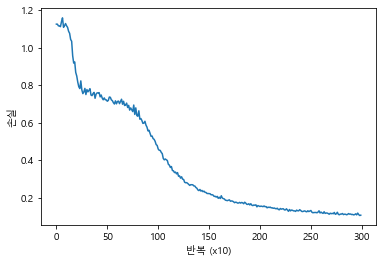

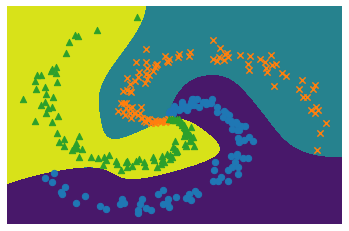

In [87]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm
from common.optimizer import SGD
from DLFromScratch2.dataset import spiral
from two_layer_net import TwoLayerNet

matplotlib.rc('font', family='Malgun Gothic')  # linux
# matplotlib.rc('font', family='AppleGothic')  # Mac

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2,
                    hidden_size=hidden_size,
                    output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in tqdm(range(max_epoch)):
    # 3. 데이터 셔플링
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| 에폭 {epoch+1} | 반복{iters+1}/{max_iters} | 손실 {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0



# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 4.4. Trainer 클래스

In [89]:
from common.optimizer import SGD
from common.trainer import Trainer
from two_layer_net import TwoLayerNet

| 에폭 1 |  반복 1 / 9 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 9 | 시간 0[s] | 손실 1.18
| 에폭 3 |  반복 1 / 9 | 시간 0[s] | 손실 1.17
| 에폭 4 |  반복 1 / 9 | 시간 0[s] | 손실 1.17
| 에폭 5 |  반복 1 / 9 | 시간 0[s] | 손실 1.13
| 에폭 6 |  반복 1 / 9 | 시간 0[s] | 손실 1.11
| 에폭 7 |  반복 1 / 9 | 시간 0[s] | 손실 1.12
| 에폭 8 |  반복 1 / 9 | 시간 0[s] | 손실 1.14
| 에폭 9 |  반복 1 / 9 | 시간 0[s] | 손실 1.12
| 에폭 10 |  반복 1 / 9 | 시간 0[s] | 손실 1.11
| 에폭 11 |  반복 1 / 9 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 9 | 시간 0[s] | 손실 1.11
| 에폭 13 |  반복 1 / 9 | 시간 0[s] | 손실 1.12
| 에폭 14 |  반복 1 / 9 | 시간 0[s] | 손실 1.13
| 에폭 15 |  반복 1 / 9 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 9 | 시간 0[s] | 손실 1.11
| 에폭 17 |  반복 1 / 9 | 시간 0[s] | 손실 1.07
| 에폭 18 |  반복 1 / 9 | 시간 0[s] | 손실 1.02
| 에폭 19 |  반복 1 / 9 | 시간 0[s] | 손실 1.00
| 에폭 20 |  반복 1 / 9 | 시간 0[s] | 손실 0.98
| 에폭 21 |  반복 1 / 9 | 시간 0[s] | 손실 0.91
| 에폭 22 |  반복 1 / 9 | 시간 0[s] | 손실 0.90
| 에폭 23 |  반복 1 / 9 | 시간 0[s] | 손실 0.86
| 에폭 24 |  반복 1 / 9 | 시간 0[s] | 손실 0.85
| 에폭 25 |  반복 1 / 9 | 시간 0[s] | 손실 0.82
| 에폭 26 |

| 에폭 228 |  반복 1 / 9 | 시간 0[s] | 손실 0.16
| 에폭 229 |  반복 1 / 9 | 시간 0[s] | 손실 0.16
| 에폭 230 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 231 |  반복 1 / 9 | 시간 0[s] | 손실 0.15
| 에폭 232 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 233 |  반복 1 / 9 | 시간 0[s] | 손실 0.15
| 에폭 234 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 235 |  반복 1 / 9 | 시간 0[s] | 손실 0.15
| 에폭 236 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 237 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 238 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 239 |  반복 1 / 9 | 시간 0[s] | 손실 0.15
| 에폭 240 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 241 |  반복 1 / 9 | 시간 0[s] | 손실 0.15
| 에폭 242 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 243 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 244 |  반복 1 / 9 | 시간 0[s] | 손실 0.16
| 에폭 245 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 246 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 247 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 248 |  반복 1 / 9 | 시간 0[s] | 손실 0.13
| 에폭 249 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 250 |  반복 1 / 9 | 시간 0[s] | 손실 0.13
| 에폭 251 |  반복 1 / 9 | 시간 0[s] | 손실 0.14
| 에폭 252 |  반복 1

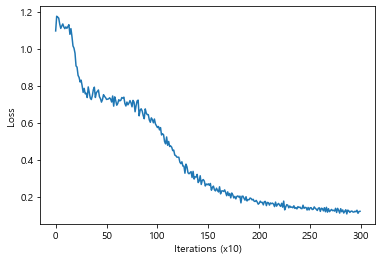

In [91]:
max_epoch = 300
batch_size = 32
hidden_size = 10
learning_rate = 1.0

x,t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval = 10)
trainer.plot()

# 1.5. 계산 고속화

In [92]:
a = np.random.randn(3)

In [96]:
b = a.astype(np.float32)
b.dtype

dtype('float32')

In [97]:
c = a.astype('f')
c.dtype

dtype('float32')